# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name: 
1. Rolle Swanljung
2. Anusha Ihalapathirana

Student number: 
1. Rolle - 2619936
2. Anusha - 2703680

## Description 

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as 
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals 

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material 

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. Each file consists one exercise type performed by single user. Data are divided on multiple folders. Note that, in each folder there is one long sequence of single exercise, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br> 
<p> Read raw data from the files. Prepare and divide each data file to shorter sequences using windowing method. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, producing several example sequences from one exercise file for classification purposes. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. Each window will consists 500x3 matrix of acceleration data and 5x192 matrix of depth image data.</p>
<br>  
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>
<br>
<p> <b>1.2</b> Split the prepared dataset to training and testing datasets so that data of persons 1-7 are used for training and data of persons 8-10 are used for testing. In next tasks, training dataset could be further divided on (multiple) validation data folds to tune the models parameters, when needed.<br>
    
<p> Note: Training set should have 1486 windows and testing set should have 598 windows. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.<p>
    
    
    
    
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In [1]:
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd

# Enter data folder location
loc = "./MEx"

In [2]:
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
paths_record = Path(loc).glob("*/*/*.csv")

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)
    
    if meta["sensor"] == "acc":
        # "time", "x", "y", "z"
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df
    
    records.append(meta)
    
df_records = pd.DataFrame.from_records(records)

print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head())
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
1,01,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...
2,01,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...
3,01,04,1,act,acc,time acc_0 acc_1 acc_2 0 ...
4,01,04,2,act,acc,time acc_0 acc_1 acc_2 0 ...


Dataframe with one measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


In [3]:
# Extract 5-second long windows with 2-second shift (3-second overlap)

records_windowed = []

time_window = 5000.
time_offset = 2000.
    
for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())
    
    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue
        
        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()
        
        records_windowed.append(tmp_data)
        
df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0].head())

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,01,01,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,01,01,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,01,01,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,01,01,1,act,acc,time acc_0 acc_1 acc_2 80...,4


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


<ipython-input-4-f188ec21f7ce>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_acc = df_acc[(df_records_windowed['subject_id'] == sub_id) & (df_records_windowed['exercise_id'] == excercise_id)]


Person 1 - Excercise 2


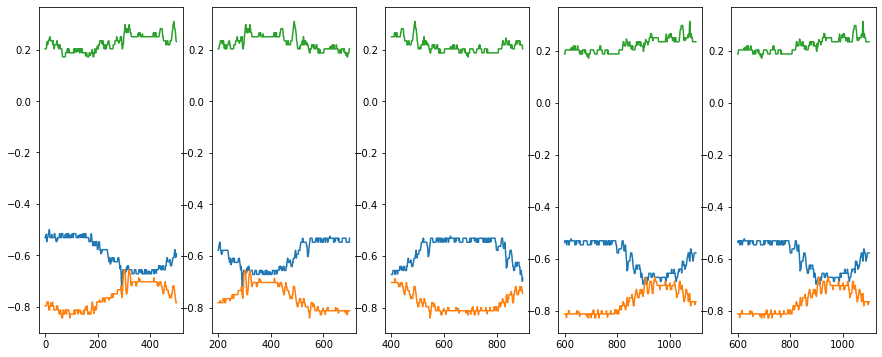

Person 1 - Excercise 5


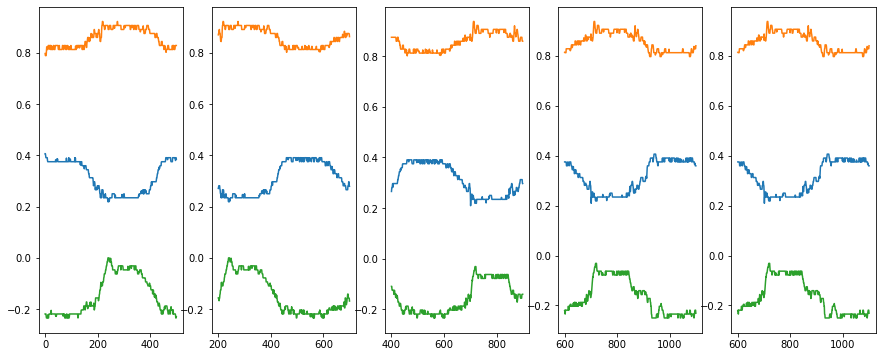

Person 1 - Excercise 6


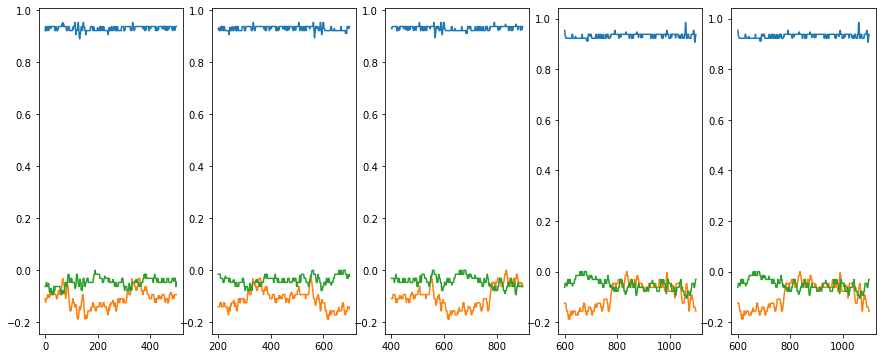

Person 5 - Excercise 2


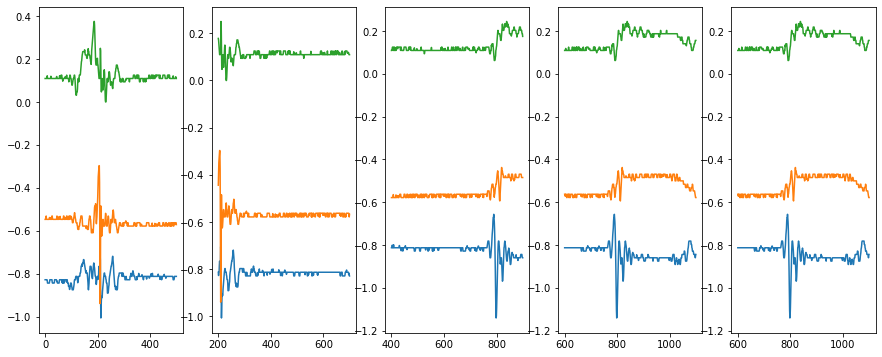

Person 5 - Excercise 5


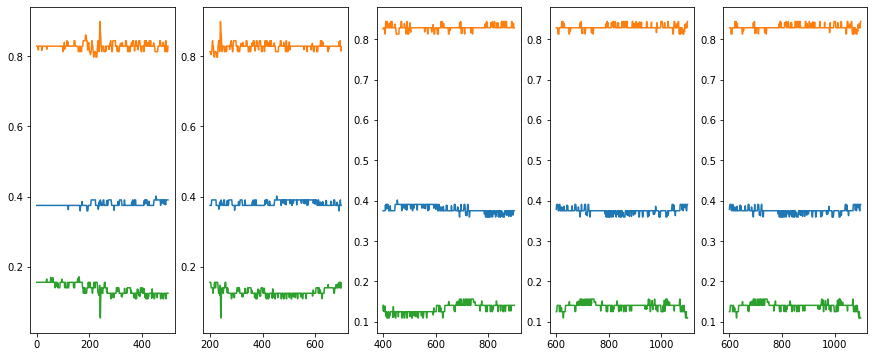

Person 5 - Excercise 6


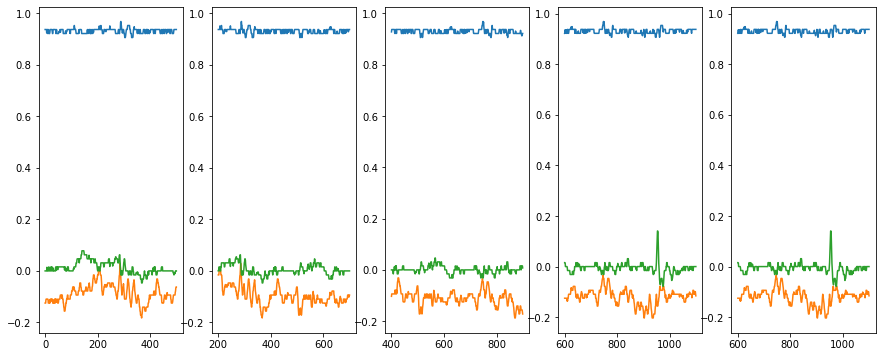

In [4]:
# 1.1. Visualize selected samples for both modalities

# Plot few examples of prepared data for each modalities (accelometer and depth camera). 
# Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image.
# Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6.
# Take the first windowed example from the long exercise sequence. - means index 0

### Your code begins here ###

from matplotlib import pyplot as plt

data_types = df_records_windowed.dtypes

def get_few_samples(df, label):
    return df[df['sensor_code'] == label]

df_new = get_few_samples(df_records_windowed, 'act')


def plot_acc_data(df_acc, sub_id, excercise_id, label):
    
    df_acc = df_acc[(df_records_windowed['subject_id'] == sub_id) & (df_records_windowed['exercise_id'] == excercise_id)]
    df_acc0 = df_acc.df.iloc[0]
    df_acc0 = df_acc0.drop('time', axis=1)
    df_acc1 = df_acc.df.iloc[1]
    df_acc1 = df_acc1.drop('time', axis=1)
    df_acc2 = df_acc.df.iloc[2]
    df_acc2 = df_acc2.drop('time', axis=1)
    df_acc3 = df_acc.df.iloc[3]
    df_acc3 = df_acc3.drop('time', axis=1)
    df_acc4 = df_acc.df.iloc[4]
    df_acc4 = df_acc4.drop('time', axis=1)
   
    f = plt.figure(figsize=(15,6)) 
    print(label)
    
    f.add_subplot(1,5,1)
    plt.plot(df_acc0)
    f.add_subplot(1,5,2)
    plt.plot(df_acc1)
    f.add_subplot(1,5,3)
    plt.plot(df_acc2)
    f.add_subplot(1,5,4)
    plt.plot(df_acc3)
    f.add_subplot(1,5,5)
    plt.plot(df_acc3)
    plt.show()
    

plot_acc_data(df_new, '01', '02', 'Person 1 - Excercise 2')
plot_acc_data(df_new, '01', '05', 'Person 1 - Excercise 5')
plot_acc_data(df_new, '01', '06', 'Person 1 - Excercise 6')

plot_acc_data(df_new, '05', '02', 'Person 5 - Excercise 2')
plot_acc_data(df_new, '05', '05', 'Person 5 - Excercise 5')
plot_acc_data(df_new, '05', '06', 'Person 5 - Excercise 6')



Person 1 - Excercise 2


<ipython-input-5-20a6de47dd39>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dc1 = df_dc1[(df_records_windowed['subject_id'] == sub_id) & (df_records_windowed['exercise_id'] == excercise_id)]


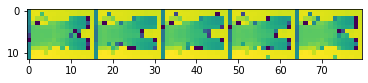

Person 1 - Excercise 5


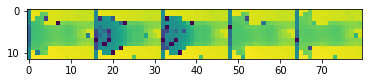

Person 1 - Excercise 6


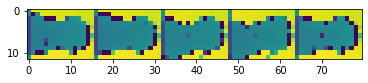

Person 5 - Excercise 2


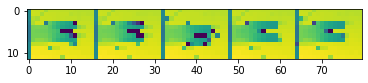

Person 5 - Excercise 5


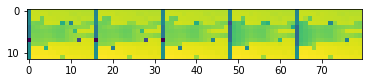

Person 5 - Excercise 6


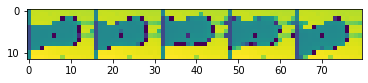

In [5]:

################ Image DC
# Plot depth image sequences

# get image data
df_dc1 = get_few_samples(df_records_windowed, 'dc')

def plot_dc_data(df_dc1, sub_id, excercise_id, label):
    
    df_dc1 = df_dc1[(df_records_windowed['subject_id'] == sub_id) & (df_records_windowed['exercise_id'] == excercise_id)]
    df_dc = df_dc1.df.iloc[0]
    df_dc = df_dc.drop('time', axis=1)
    print(label)
    img_arr = df_dc.iloc[0].to_numpy().reshape(12,16)
    for i in range(1,len(df_dc)):
        img_arr = np.concatenate((img_arr, df_dc.iloc[i].to_numpy().reshape(12,16)), axis=1)
    plt.imshow(img_arr, interpolation='nearest')
    plt.show()

    
plot_dc_data(df_dc1, '01', '02', 'Person 1 - Excercise 2')
plot_dc_data(df_dc1, '01', '05', 'Person 1 - Excercise 5')
plot_dc_data(df_dc1, '01', '06', 'Person 1 - Excercise 6')

plot_dc_data(df_dc1, '05', '02', 'Person 5 - Excercise 2')
plot_dc_data(df_dc1, '05', '05', 'Person 5 - Excercise 5')
plot_dc_data(df_dc1, '05', '06', 'Person 5 - Excercise 6')


### Your code ends here ###


#### Here we Split the data samples based on subject ID into training and testing datasets.

Merge the acceleration data and image data so that we can remove the unpair windows.

After removing the unnecessary columns we rename other columns. 

Finally printed number of samples, dimensions in training and testing set and visualize training set and testing set 


In [6]:
# 1.2. Split samples based on subject ID into training and testing datasets for futher experiments

### Your code begins here ###

# make a copy of df_records_windowed dataframe
df = df_records_windowed.copy()

# convert object types to int to make futher processing easier
df['subject_id'] = df_records_windowed['subject_id'].astype(str).astype(int)
df['exercise_id'] = df_records_windowed['exercise_id'].astype(str).astype(int)


df_train = df[df['subject_id'] <= 7] # train data -> users upto id = 7 
df_test = df[df['subject_id'] >= 8] # test data -> users from = 8 to 10

# merge 2 dataframes so that we can remove the unpaired windows.
def pair(df):

    df_acc = df[df['sensor_code'] == 'act']
    df_dc = df[df['sensor_code'] == 'dc']
    
    new_df = pd.merge(df_acc, df_dc,  how='right', left_on=['subject_id','trial', 'window_idx', 'exercise_id'],
                      right_on = ['subject_id','trial', 'window_idx', 'exercise_id'])

    return new_df
    

df_train_pair = pair(df_train)
df_test_pair = pair(df_test)

# remove un necessary columns since we pair up the data we dont need this
df_train_pair = df_train_pair.drop(['sensor_code_x','sensor_x', 'sensor_code_y', 'sensor_y'], axis=1)
df_test_pair = df_test_pair.drop(['sensor_code_x','sensor_x', 'sensor_code_y', 'sensor_y'], axis=1)

df_train_pair = df_train_pair.rename(columns={'df_x': 'df_acc', 'df_y': 'df_dc'})
df_test_pair = df_test_pair.rename(columns={'df_x': 'df_acc', 'df_y': 'df_dc'})

df_test_pair.dtypes
### Your code ends here ###


# calculate the indicator statistics of training and testing datasets
# (number of examples, dimensions of each example) and visualize prepared examples

# df train data 
print("==========  Training dataset  =============")

# df_train_pair.info()
print('Number of rows in training set - ', len(df_train_pair))
print('Number of Columns/dimentions in training set - ', len(df_train_pair.columns))
print('Shape of the training set - ', df_train_pair.shape)
print('Column names of training set - ', list(df_train_pair.columns))

print("\n==========  Testing dataset  =============")
print('Number of rows in test set - ', len(df_test_pair))
print('Number of Columns/dimentions in test set - ', len(df_test_pair.columns))
print('Shape of the test set - ', df_test_pair.shape)
print('Column names of test set - ', list(df_test_pair.columns))


print('\n Training set')
df_train_pair


==========  Training dataset  =============
Number of rows in training set -  1486
Number of Columns/dimentions in training set -  6
Shape of the training set -  (1486, 6)
Column names of training set -  ['subject_id', 'exercise_id', 'trial', 'df_acc', 'window_idx', 'df_dc']

==========  Testing dataset  =============
Number of rows in test set -  598
Number of Columns/dimentions in test set -  6
Shape of the test set -  (598, 6)
Column names of test set -  ['subject_id', 'exercise_id', 'trial', 'df_acc', 'window_idx', 'df_dc']

 Training set


,subject_id,exercise_id,trial,df_acc,window_idx,df_dc
0,1,1,1,time acc_0 acc_1 acc_2 0 ...,0,time dc_0 dc_1 dc_2 dc_3 d...
1,1,1,1,time acc_0 acc_1 acc_2 200 ...,1,time dc_0 dc_1 dc_2 dc_3 d...
2,1,1,1,time acc_0 acc_1 acc_2 400 ...,2,time dc_0 dc_1 dc_2 dc_3 d...
3,1,1,1,time acc_0 acc_1 acc_2 60...,3,time dc_0 dc_1 dc_2 dc_3 ...
4,1,1,1,time acc_0 acc_1 acc_2 80...,4,time dc_0 dc_1 dc_2 dc_3 ...
...,...,...,...,...,...,...
1481,7,7,1,time acc_0 acc_1 acc_2 66...,33,time dc_0 dc_1 dc_2 dc_3 ...
1482,7,7,1,time acc_0 acc_1 acc_2 68...,34,time dc_0 dc_1 dc_2 dc_3 ...
1483,7,7,1,time acc_0 acc_1 acc_2 70...,35,time dc_0 dc_1 dc_2 dc_3 ...
1484,7,7,1,time acc_0 acc_1 acc_2 72...,36,time dc_0 dc_1 dc_2 dc_3 ...


In [7]:
print('\n Testing set')
df_test_pair



 Testing set


,subject_id,exercise_id,trial,df_acc,window_idx,df_dc
0,8,1,1,time acc_0 acc_1 acc_2 0 ...,0,time dc_0 dc_1 dc_2 dc_3 d...
1,8,1,1,time acc_0 acc_1 acc_2 200 ...,1,time dc_0 dc_1 dc_2 dc_3 d...
2,8,1,1,time acc_0 acc_1 acc_2 400 ...,2,time dc_0 dc_1 dc_2 dc_3 d...
3,8,1,1,time acc_0 acc_1 acc_2 60...,3,time dc_0 dc_1 dc_2 dc_3 ...
4,8,1,1,time acc_0 acc_1 acc_2 80...,4,time dc_0 dc_1 dc_2 dc_3 ...
...,...,...,...,...,...,...
593,10,7,1,time acc_0 acc_1 acc_2 50...,25,time dc_0 dc_1 dc_2 dc_3 ...
594,10,7,1,time acc_0 acc_1 acc_2 52...,26,time dc_0 dc_1 dc_2 dc_3 ...
595,10,7,1,time acc_0 acc_1 acc_2 54...,27,time dc_0 dc_1 dc_2 dc_3 ...
596,10,7,1,time acc_0 acc_1 acc_2 56...,28,time dc_0 dc_1 dc_2 dc_3 ...


# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 23-24) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br>
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 2.1-2.2.
    
</div>

### Task 2.1

Downsample and standardization for training and test sets

In [101]:
# 2.1

### Your code begins here ###
from scipy import signal

# downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix 
# of data for each 5 sec window. 

# get accelerometer  data from training set
train_set = df_train_pair.copy()
test_set = df_test_pair.copy()

scaler = StandardScaler()

def standardize_3d_arrays(traindata,testdata):
    for i in range(traindata.shape[2]):
        testdata[:,:,i] = (testdata[:,:,i] - np.mean(traindata[:,:,i],axis=0)) / np.std(traindata[:,:,i],axis=0)
        traindata[:,:,i] = (traindata[:,:,i] - np.mean(traindata[:,:,i],axis=0)) / np.std(traindata[:,:,i],axis=0)
    return traindata,testdata
    
def downsample(row):
    row = signal.resample(row, 125)
    return row

def drop_time(row):
    row = row.drop(['time'], axis = 1)
    return row
    
train_acc = np.array([downsample(drop_time(x)) for x in train_set['df_acc']])
test_acc = np.array([downsample(drop_time(x)) for x in test_set['df_acc']])

train_acc, test_acc = standardize_3d_arrays(train_acc,test_acc)

print(train_acc.shape)
print(test_acc.shape)

(1486, 125, 3)
(598, 125, 3)


PCA for ACC

In [102]:
#  Using training dataset, fit PCA with 5-dimensional subspace 
# (i.e., choosing the 5 largest principal components)
# and fit LDA with 5-dimensional subspace. 

from sklearn.decomposition import PCA

pca_train_acc = train_acc.copy()
pca_test_acc = test_acc.copy()

pca = PCA(n_components=5)

def combine_rows_vertically_norm(row):
    df_line = row[0]
    for i in range(1, len(row)):
        df_line = np.vstack((df_line,row[i])) # Combine transformed acc axes into one matrix
    df_acc = pd.DataFrame(data=df_line) # Transform numpy array into pandas dataframe
    return df_acc.T

def combine_rows_vertically_as_df(row):
    df_line = row[0]
    for i in range(1, len(row)):
        df_line = np.vstack((df_line,row[i])) # Combine transformed acc axes into one matrix
    df_acc = pd.DataFrame(data=df_line) # Transform numpy array into pandas dataframe
    return df_acc

def pca_transform_acc(traindata,testdata):
    pca_train = np.empty((traindata.shape[0],5,traindata.shape[2])) ### Same shape as original data except 5 is the PCA dimension
    pca_test = np.empty((testdata.shape[0],5,testdata.shape[2])) ### Same shape as original data except 5 is the PCA dimension
    for i in range(traindata.shape[2]):
        pca_train[:,:,i] = pca.fit_transform(traindata[:,:,i])
        pca_test[:,:,i] = pca.transform(testdata[:,:,i])
    return pca_train,pca_test

def acc_data_to_pandas(data):
    df = pd.DataFrame(data=[pd.DataFrame(data=x.T) for x in data])
    return df

pca_train,pca_test = pca_transform_acc(pca_train_acc,pca_test_acc)

pca_train_df = train_set.copy()
pca_test_df = test_set.copy()

pca_train_df['df_acc'] = acc_data_to_pandas(pca_train)
pca_test_df['df_acc'] = acc_data_to_pandas(pca_test)


In [96]:
pca_test_df['df_acc'][0]  # check data
#print('pca_train shape: ', pca_train.shape) # check data
#pca_train[0]  # check data

,0,1,2,3,4
0,-9.654549,-0.533743,-0.433032,-0.266227,1.903730
1,-10.896741,0.316527,-2.793415,-0.476947,-0.395026
2,5.289553,0.017718,9.620182,-0.877600,-1.205172


LDA for ACC

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_train_acc = train_acc.copy() # Copy original dataset so it is not affected
lda_test_acc = test_acc.copy()

lda = LinearDiscriminantAnalysis(n_components=5) # LDA with 5 dimensions

def lda_transform_acc(traindata,testdata):
    lda_train = np.empty((traindata.shape[0],5,traindata.shape[2])) ### Same shape as original data except 5 is the PCA dimension
    lda_test = np.empty((testdata.shape[0],5,testdata.shape[2])) ### Same shape as original data except 5 is the PCA dimension
    for i in range(traindata.shape[2]):
        lda_train[:,:,i] = lda.fit_transform(traindata[:,:,i],train_set['exercise_id'])
        lda_test[:,:,i] = lda.transform(testdata[:,:,i])
    return lda_train,lda_test

lda_train,lda_test = lda_transform_acc(lda_train_acc,lda_test_acc)

lda_train_df = train_set.copy()
lda_test_df = test_set.copy()

lda_train_df['df_acc'] = acc_data_to_pandas(lda_train)
lda_test_df['df_acc'] = acc_data_to_pandas(lda_test)

In [104]:
lda_train_df['df_acc'][0] # check data 
#print('lda_train shape: ', lda_train.shape) # check data
#lda_train[0]  # check data

,0,1,2,3,4
0,2.587091,-0.211466,-2.451993,0.577486,-0.473091
1,-0.195536,1.392326,0.243445,0.876051,1.018085
2,1.042676,2.872428,1.701427,1.275850,-0.499874


PCA and LDA fusion for ACC

In [105]:
def pair(x):
    new_df = pd.concat([x[0], x[1]], axis=1, ignore_index=True)
    return new_df.to_numpy()
    
train_pca_lda_acc = [pair(x) for i,x in enumerate(zip(pca_train_df['df_acc'],lda_train_df['df_acc']))] # Combine PCA and LDA data to 3x10 (3x5+5) shape.
train_pca_lda_acc = np.array(train_pca_lda_acc)
test_pca_lda_acc = [pair(x) for i,x in enumerate(zip(pca_test_df['df_acc'],lda_test_df['df_acc']))]
test_pca_lda_acc = np.array(test_pca_lda_acc)

def compute_distance_acc(testsample):
    pca_distance = np.sum(np.sum(np.square(testsample[:,0:5] - train_pca_lda_acc[:,:,0:5]),axis=2),axis=1)
    lda_distance = np.sum(np.sum(np.square(testsample[:,5:10] - train_pca_lda_acc[:,:,5:10]),axis=2),axis=1)
    pca_distance = scale_distance(pca_distance)    
    lda_distance = scale_distance(lda_distance)
    return [pca_distance, lda_distance]

def scale_distance(distance):
    scaled_distance = (distance - np.min(distance)) / (np.max(distance) - np.min(distance))
    return scaled_distance

def fuse_average(dists):
    fused_avg = (dists[0]+dists[1]) / 2
    return fused_avg
    
def classify(fused_avg):
    class_prediction = lda_train_df['exercise_id'][np.argmin(fused_avg)]
    return class_prediction

test_predictions = [classify(fuse_average(compute_distance_acc(x))) for i,x in enumerate(test_pca_lda_acc)]

Performance evaluation

Classification report: 
               precision    recall  f1-score   support

        ex 1       0.11      0.82      0.19        11
        ex 2       0.35      0.21      0.26       138
        ex 3       0.26      0.29      0.27        76
        ex 4       0.86      1.00      0.93        69
        ex 5       0.67      0.63      0.65        95
        ex 6       0.68      0.37      0.48       163
        ex 7       0.35      0.65      0.46        46

    accuracy                           0.47       598
   macro avg       0.47      0.57      0.46       598
weighted avg       0.53      0.47      0.47       598

Precision score: 
 [0.10588235 0.3452381  0.25581395 0.8625     0.66666667 0.68181818
 0.35294118]
Recall score: 
 [0.81818182 0.21014493 0.28947368 1.         0.63157895 0.36809816
 0.65217391]
Accuracy score: 
 0.4665551839464883
F1 score: 
 0.461613180200539


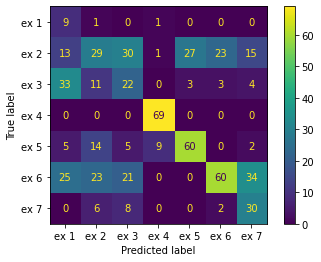

In [106]:
from sklearn import metrics

def stats_and_cf(test_predictions, test_true_labels):
    class_labels = ['ex 1','ex 2','ex 3','ex 4','ex 5','ex 6', 'ex 7']

    pre = metrics.precision_score(test_predictions, test_true_labels,average=None)
    recall = metrics.recall_score(test_predictions, test_true_labels,average=None)
    f1 = (1/len(class_labels))*np.sum(2*(pre*recall)/(pre+recall))

    print("Classification report: \n", metrics.classification_report(test_predictions, test_true_labels, target_names=class_labels))
    print("Precision score: \n", pre)
    print("Recall score: \n", recall)
    print("Accuracy score: \n", metrics.accuracy_score(test_predictions, test_true_labels))
    print("F1 score: \n", f1)

    # Confusion matrix for testing set
    cm = metrics.confusion_matrix(test_predictions,test_true_labels)
    metrics.ConfusionMatrixDisplay(cm,display_labels=class_labels).plot()


stats_and_cf(test_predictions, test_set['exercise_id'].to_numpy())
### End of task 2.1
### Your code ends here ###

### Task 2.2 

Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results.

In [18]:
# 2.2

### Your code begins here ###

# standardize the values to zero mean and unit variance before the transformations

train_set['df_dc'] = [standardize(drop_time(x)) for x in train_set['df_dc']] 
test_set['df_dc'] = [standardize(drop_time(x)) for x in test_set['df_dc']] 

#train_set['df_dc'][0]

### Your code ends here ###

In [19]:
# 2.2

### Your code begins here ###

# standardize the values to zero mean and unit variance before the transformations
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_set = df_train_pair.copy()
test_set = df_test_pair.copy()


def drop_time(row):
    row = row.drop(['time'], axis = 1)
    return row

# train_set['df_dc'] = [standardize(drop_time(x)) for x in train_set['df_dc']] 
# test_set['df_dc'] = [standardize(drop_time(x)) for x in test_set['df_dc']] 

# train_set['df_dc'][0]

# ### Your code ends here ###


norm_train_df = train_set.copy() 
norm_test_df = test_set.copy()

# norm_train_df = norm_train_df.drop('time', axis=1)
# norm_test_df = norm_test_df.drop('time', axis=1)


def combine_rows_vertically_norm(row):
    df_line = row[0]
    for i in range(1, len(row)):
        df_line = np.vstack((df_line,row[i])) # Combine transformed acc axes into one matrix
    df_acc = pd.DataFrame(data=df_line) # Transform numpy array into pandas dataframe
    return df_acc

acc_norm_set = [x.to_numpy() for i,x in enumerate(norm_train_df['df_dc'])] 
acc_norm_set = np.array(acc_norm_set) 

acc_norm_testset = [x.to_numpy() for i,x in enumerate(norm_test_df['df_dc'])]
acc_norm_testset = np.array(acc_norm_testset)


acc_norm_set0 = scaler.fit_transform(acc_norm_set[:,0,:]) # Transforms acc_0 axis from all samples against true classes
acc_norm_testset0 = scaler.transform(acc_norm_testset[:,0,:])

acc_norm_set1 = scaler.fit_transform(acc_norm_set[:,1,:])
acc_norm_testset1 = scaler.transform(acc_norm_testset[:,1,:])

acc_norm_set2 = scaler.fit_transform(acc_norm_set[:,2,:])
acc_norm_testset2 = scaler.transform(acc_norm_testset[:,2,:])

acc_norm_set3 = scaler.fit_transform(acc_norm_set[:,3,:])
acc_norm_testset3 = scaler.transform(acc_norm_testset[:,3,:])

acc_norm_set4 = scaler.fit_transform(acc_norm_set[:,4,:])
acc_norm_testset4 = scaler.transform(acc_norm_testset[:,4,:])

train_set['df_dc'] = [combine_rows_vertically_norm(x) for i,x in enumerate(zip(acc_norm_set0,acc_norm_set1,acc_norm_set2, acc_norm_set3, acc_norm_set4))]
test_set['df_dc'] = [combine_rows_vertically_norm(x) for i,x in enumerate(zip(acc_norm_testset0,acc_norm_testset1,acc_norm_testset2, acc_norm_testset3, acc_norm_testset4))]


test_set['df_dc'][0]

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-1.400718,0.069297,0.191462,0.165035,0.094868,-0.118616,0.010000,-0.391466,-0.399203,-0.397297,...,-0.389611,-0.395798,0.418062,-0.092121,-0.458469,-0.745050,-1.059478,-0.790898,-1.291155,-2.088555
1,-1.400718,0.059776,0.181371,0.165061,0.082281,-0.085656,-0.001699,-0.589310,-0.540878,-0.297887,...,-0.375111,-0.408656,0.434149,-0.050957,-0.565728,-0.760799,-0.605374,-0.706785,-1.328372,-2.003341
2,-1.400718,0.059699,0.187077,0.165445,0.086252,-0.103340,0.017588,-0.390448,-0.415952,-0.401536,...,-0.386236,-0.364293,0.413030,-0.087987,-0.458588,-0.745396,-1.005554,-0.803351,-1.292502,-2.008595
3,-1.400718,0.050820,0.176419,0.163525,0.080235,-0.085664,-0.006522,-0.567581,-0.568637,-0.291640,...,-0.371513,-0.410289,0.433241,-0.064108,-5.874279,-7.803620,-9.912444,-0.707096,-1.330326,-2.040653
4,-1.400718,0.054913,0.208972,0.165671,0.083435,-0.100936,0.018695,-0.396440,-0.332916,-0.382807,...,-0.383232,-0.396785,0.411616,-0.085802,-0.487566,-0.787441,-1.038610,-0.794117,-1.331213,-2.015263


In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

pca_train_df = train_set.copy() # Copy original dataset so it is not affected
pca_test_df = test_set.copy()

def combine_rows_vertically(row):
    df_line = row[0]
    for i in range(1, len(row)):
        df_line = np.vstack((df_line,row[i]))
        
    
    df_line = df_line.reshape((5,1,5))
    return df_line

dc_pca_set = [x for i,x in enumerate(pca_train_df['df_dc'])] # Transform dataframe rows into numpy list for easier later use
dc_pca_set = np.array(dc_pca_set) # Transform list into array for later use

dc_pca_testset = [x for i,x in enumerate(pca_test_df['df_dc'])]
dc_pca_testset = np.array(dc_pca_testset)

dc_pca_set0 = pca.fit_transform(dc_pca_set[:,0,:]) # Transforms acc_0 axis from all samples against true classes
dc_pca_testset0 = pca.transform(dc_pca_testset[:,0,:])

dc_pca_set1 = pca.fit_transform(dc_pca_set[:,1,:])
dc_pca_testset1 = pca.transform(dc_pca_testset[:,1,:])

dc_pca_set2 = pca.fit_transform(dc_pca_set[:,2,:])
dc_pca_testset2 = pca.transform(dc_pca_testset[:,2,:])

dc_pca_set3 = pca.fit_transform(dc_pca_set[:,3,:]) # Transforms acc_0 axis from all samples against true classes
dc_pca_testset3 = pca.transform(dc_pca_testset[:,3,:])

dc_pca_set4 = pca.fit_transform(dc_pca_set[:,4,:])
dc_pca_testset4 = pca.transform(dc_pca_testset[:,4,:])

pca_train_df['df_dc'] = [combine_rows_vertically(x) for i,x in enumerate(zip(dc_pca_set0,dc_pca_set1,dc_pca_set2,dc_pca_set3,dc_pca_set4))]
pca_test_df['df_dc'] = [combine_rows_vertically(x) for i,x in enumerate(zip(dc_pca_testset0,dc_pca_testset1,dc_pca_testset2,dc_pca_testset3,dc_pca_testset4))]


In [21]:
display(pca_train_df['df_dc'][0].shape)
pca_train_df['df_dc'][0]

(5, 1, 5)

array([[[-2.95365317,  2.61770572, -1.81371196,  0.47840565,
          0.28744285]],

       [[-3.09810155, -2.95800205,  0.51090349,  3.08465581,
          7.53909482]],

       [[-3.04683852, -3.22994873,  0.92961176,  3.94687314,
          5.66291287]],

       [[-2.99684153,  2.27078452,  1.49675164,  0.22837543,
          0.30956314]],

       [[-2.71021099,  9.17217601, -3.63821578,  2.59753245,
          0.75627055]]])

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_train_df = train_set.copy() # Copy original dataset so it is not affected
lda_test_df = test_set.copy()

lda = LinearDiscriminantAnalysis(n_components=5) # LDA with 5 dimensions

dc_set = [x for i,x in enumerate(lda_train_df['df_dc'])] # Transform dataframe rows into numpy list for easier later use
dc_set = np.array(dc_set) # Transform list into array for later use

dc_testset = [x for i,x in enumerate(lda_test_df['df_dc'])]
dc_testset = np.array(dc_testset)

dc_set0 = lda.fit_transform(dc_set[:,0,:], lda_train_df['exercise_id']) # Transforms acc_0 axis from all samples against true classes
dc_testset0 = lda.transform(dc_testset[:,0,:])
dc_set1 = lda.fit_transform(dc_set[:,1,:], lda_train_df['exercise_id'])
dc_testset1 = lda.transform(dc_testset[:,1,:])
dc_set2 = lda.fit_transform(dc_set[:,2,:], lda_train_df['exercise_id'])
dc_testset2 = lda.transform(dc_testset[:,2,:])
dc_set3 = lda.fit_transform(dc_set[:,3,:], lda_train_df['exercise_id'])
dc_testset3 = lda.transform(dc_testset[:,3,:])
dc_set4 = lda.fit_transform(dc_set[:,4,:], lda_train_df['exercise_id'])
dc_testset4 = lda.transform(dc_testset[:,4,:])

lda_train_df['df_dc'] = [combine_rows_vertically(x) for i,x in enumerate(zip(dc_set0,dc_set1,dc_set2,dc_set3,dc_set4))] # Calls combine_dc_lda_rows to make full dataframe from transformed datasets
lda_test_df['df_dc'] = [combine_rows_vertically(x) for i,x in enumerate(zip(dc_testset0,dc_testset1,dc_testset2,dc_testset3,dc_testset4))]



In [23]:
display(lda_train_df['df_dc'][0].shape)
lda_train_df['df_dc'][0]

(5, 1, 5)

array([[[-2.83135953, -0.50739757, -1.71728165,  0.19882813,
         -1.03145257]],

       [[-2.90607982,  1.15212525, -3.78696634,  2.91303119,
          1.20635294]],

       [[-2.39111632,  1.92363158, -2.21486211,  1.00953396,
         -1.07733102]],

       [[-2.05302199, -0.34166898, -0.72093143,  0.23377226,
          0.99052332]],

       [[-2.6079862 ,  1.79209289, -3.83090058,  3.66817155,
         -0.88804926]]])

In [24]:
def pair(x):
    new_df = np.dstack([x[0], x[1]]) 
    return new_df
    
train_pca_lda_df = [pair(x) for i,x in enumerate(zip(pca_train_df['df_dc'],lda_train_df['df_dc']))] # Combine PCA and LDA data to 3x10 (3x5+5) shape.
train_pca_lda_df = np.array(train_pca_lda_df)
test_pca_lda_df = [pair(x) for i,x in enumerate(zip(pca_test_df['df_dc'],lda_test_df['df_dc']))]
test_pca_lda_df = np.array(test_pca_lda_df)

def compute_distance_dc(testsample):
    pca_distance = np.sum(np.sum(np.sum(np.square(testsample[:,:,0:5] - train_pca_lda_df[:,:,:,0:5]),axis=2),axis=1), axis = 1)
    lda_distance = np.sum(np.sum(np.sum(np.square(testsample[:,:,5:10] - train_pca_lda_df[:,:,:,5:10]),axis=2),axis=1), axis=1)
    pca_distance = scale_distance(pca_distance)    
    lda_distance = scale_distance(lda_distance)
    return [pca_distance, lda_distance]
    
def classify(fused_avg):
    class_prediction = lda_train_df['exercise_id'][np.argmin(fused_avg)]
    return class_prediction

test_predictions = [classify(fuse_average(compute_distance_dc(x))) for i,x in enumerate(test_pca_lda_df)]


Classification report: 
               precision    recall  f1-score   support

        ex 1       1.00      0.42      0.59       202
        ex 2       0.62      0.44      0.51       119
        ex 3       0.02      0.12      0.04        17
        ex 4       0.26      0.95      0.41        22
        ex 5       0.74      1.00      0.85        67
        ex 6       0.34      0.97      0.50        31
        ex 7       0.96      0.59      0.73       140

    accuracy                           0.57       598
   macro avg       0.56      0.64      0.52       598
weighted avg       0.80      0.57      0.61       598

Precision score: 
 [1.         0.61904762 0.02325581 0.2625     0.74444444 0.34090909
 0.96470588]
Recall score: 
 [0.42079208 0.43697479 0.11764706 0.95454545 1.         0.96774194
 0.58571429]
Accuracy score: 
 0.5668896321070234
F1 score: 
 0.5202633110460967


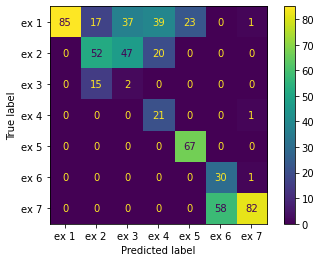

In [25]:
from sklearn import metrics

stats_and_cf(test_predictions, test_set['exercise_id'].to_numpy())

### End of task 2.2
### Your code ends here ###

# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   
<br> 
<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>
<br>  
<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>
<br> 
<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 3.1-3.3.
    
</div>

PCA with 10 dimensions for ACC data

In [26]:
# 3.1

### Your code begins here ###

pca_train_df = df_train_pair.copy()
pca_test_df = df_test_pair.copy()

pca_train_df['df_acc'] = [standardize(downsample(drop_time(x))) for x in pca_train_df['df_acc']] 
pca_test_df['df_acc'] = [standardize(downsample(drop_time(x))) for x in pca_test_df['df_acc']] 

pca = PCA(n_components=10)

def combine_rows_horizontally(row): # Calling this function, order of rows matter.
    df_line = row[0]
    for i in range(1, len(row)):
        df_line = np.hstack((df_line,row[i]))
    return df_line

acc_pca_set = [x for i,x in enumerate(pca_train_df['df_acc'])] # Transform dataframe rows into numpy list for easier later use
acc_pca_set = np.array(acc_pca_set) # Transform list into array for later use

acc_pca_testset = [x for i,x in enumerate(pca_test_df['df_acc'])]
acc_pca_testset = np.array(acc_pca_testset)

acc_pca_set0 = pca.fit_transform(acc_pca_set[:,:,0]) # Transforms acc_0 axis from all samples against true classes
set0_train_mean = np.mean(acc_pca_set0,axis=1) # 1486 means (for every sample)
set0_train_std = np.std(acc_pca_set0,axis=1) # 1486 stds (for every sample)

acc_pca_testset0 = pca.transform(acc_pca_testset[:,:,0])
set0_test_mean = np.mean(acc_pca_testset0,axis=1)
set0_test_std = np.std(acc_pca_testset0,axis=1)

acc_pca_set1 = pca.fit_transform(acc_pca_set[:,:,1])
set1_train_mean = np.mean(acc_pca_set1,axis=1)
set1_train_std = np.std(acc_pca_set1,axis=1)

acc_pca_testset1 = pca.transform(acc_pca_testset[:,:,1])
set1_test_mean = np.mean(acc_pca_testset1,axis=1)
set1_test_std = np.std(acc_pca_testset1,axis=1)

acc_pca_set2 = pca.fit_transform(acc_pca_set[:,:,2])
set2_train_mean = np.mean(acc_pca_set2,axis=1)
set2_train_std = np.std(acc_pca_set2,axis=1)

acc_pca_testset2 = pca.transform(acc_pca_testset[:,:,2])
set2_test_mean = np.mean(acc_pca_testset2,axis=1)
set2_test_std = np.std(acc_pca_testset2,axis=1)

train_mean_std_vector = np.array([set0_train_mean, set0_train_std, set1_train_mean, set1_train_std, set2_train_mean, set2_train_std]).T # 1486 vectors of size 1x6
test_mean_std_vector = np.array([set0_test_mean, set0_test_std, set1_test_mean, set1_test_std, set2_test_mean, set2_test_std]).T

pca_train_df['df_acc'] = [combine_rows_horizontally(x) for i,x in enumerate(zip(acc_pca_set0,acc_pca_set1,acc_pca_set2,train_mean_std_vector))] # Combine function is called and train_mean_std_vector is placed at the end.
pca_test_df['df_acc'] = [combine_rows_horizontally(x) for i,x in enumerate(zip(acc_pca_testset0,acc_pca_testset1,acc_pca_testset2,test_mean_std_vector))]

### Your code ends here ###

In [27]:
display(pca_train_df['df_acc'][0].shape)
pca_train_df['df_acc'][0]

(36,)

array([ 2.60192025e-01,  6.87384514e+00, -1.72087815e+00, -7.60239068e+00,
       -8.38193381e-01,  2.63236786e+00,  2.38857394e-01,  6.60508965e-01,
        1.07502409e+00, -7.71177196e-03, -1.07120760e+01, -1.14031533e+00,
        5.01877391e-01,  2.22287974e+00, -6.65985046e-01,  7.97628212e-01,
       -3.76171989e-01,  2.44183720e-01, -2.30040927e-01, -5.87023528e-02,
       -1.09674225e+01, -1.17559723e+00,  4.62370858e-01, -5.47307829e-01,
       -9.97129868e-01,  6.66882222e-01,  2.21909660e-01,  4.17668291e-02,
        3.98570357e-01,  1.95346109e-01,  1.57162148e-01,  3.42212219e+00,
       -9.41672254e-01,  3.37211717e+00, -1.17006114e+00,  3.31928146e+00])

PCA with 10 dimensions for DC data

In [28]:
# 3.2

### Your code begins here ###

pca = PCA(n_components=10)

pca_train_df['df_dc'] = [standardize(drop_time(x)) for x in pca_train_df['df_dc']] 
pca_test_df['df_dc'] = [standardize(drop_time(x)) for x in pca_test_df['df_dc']] 


dc_pca_set = [x for i,x in enumerate(pca_train_df['df_dc'])] # Transform dataframe rows into numpy list for easier later use
dc_pca_set = np.array(dc_pca_set) # Transform list into array for later use

dc_pca_testset = [x for i,x in enumerate(pca_test_df['df_dc'])]
dc_pca_testset = np.array(dc_pca_testset)

dc_pca_set0 = pca.fit_transform(dc_pca_set[:,0,:]) # Transforms acc_0 axis from all samples against true classes
dc_pca_testset0 = pca.transform(dc_pca_testset[:,0,:])

dc_pca_set1 = pca.fit_transform(dc_pca_set[:,1,:])
dc_pca_testset1 = pca.transform(dc_pca_testset[:,1,:])

dc_pca_set2 = pca.fit_transform(dc_pca_set[:,2,:])
dc_pca_testset2 = pca.transform(dc_pca_testset[:,2,:])

dc_pca_set3 = pca.fit_transform(dc_pca_set[:,3,:]) # Transforms acc_0 axis from all samples against true classes
dc_pca_testset3 = pca.transform(dc_pca_testset[:,3,:])

dc_pca_set4 = pca.fit_transform(dc_pca_set[:,4,:])
dc_pca_testset4 = pca.transform(dc_pca_testset[:,4,:])

pca_train_df['df_dc'] = [combine_rows_horizontally(x) for i,x in enumerate(zip(dc_pca_set0,dc_pca_set1,dc_pca_set2,dc_pca_set3,dc_pca_set4))]
pca_test_df['df_dc'] = [combine_rows_horizontally(x) for i,x in enumerate(zip(dc_pca_testset0,dc_pca_testset1,dc_pca_testset2,dc_pca_testset3,dc_pca_testset4))]

### Your code ends here ###

In [29]:
display(pca_train_df['df_dc'][0].shape)
pca_train_df['df_dc'][0]

(50,)

array([ 4.32226656, -1.44156797, -3.60783746,  2.12743997, -0.04304187,
        0.83967834,  1.20720901, -2.88674196,  1.14892359, -1.45080986,
        0.17828361,  3.94886563, -2.54235855,  1.7469999 , -1.5614771 ,
        2.20866717, -1.19495789, -0.33707472, -2.19244513, -0.79742508,
        3.86781197,  8.28408351,  2.84161281, -1.32759386,  0.16241109,
       -2.19757891,  0.71298406,  1.22150035, -0.24022972, -0.04054867,
        0.53359483, -1.40964605, -1.44457819, -1.38385569, -0.47023166,
       -0.14383627, -1.1019125 , -0.21746262, -1.70792765,  0.16365408,
        0.71353286, -8.76054666,  1.87075203, -0.99135117, -1.86856265,
       -0.18808807, -2.05732561, -1.55397401, -2.54288833,  0.02537824])

3.3 Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.

In [30]:
# 3.3

### Your code begins here ###
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

trainset = [combine_rows_horizontally(x) for i,x in enumerate(zip(pca_train_df['df_acc'],pca_train_df['df_dc']))]
trainset = np.array(trainset)
trainset = scaler.fit_transform(trainset)

testset = [combine_rows_horizontally(x) for i,x in enumerate(zip(pca_test_df['df_acc'], pca_test_df['df_dc']))]
testset = np.array(testset)
testset = scaler.transform(testset)

svm_clf = svm.SVC(kernel='rbf')
svm_clf.fit(trainset, train_set['exercise_id'])
svm_predictions = svm_clf.predict(testset)

gnb_clf = GaussianNB()
gnb_clf.fit(trainset, train_set['exercise_id'])
gnb_predictions = gnb_clf.predict(testset)


Support vector machines classification
Classification report: 
               precision    recall  f1-score   support

        ex 1       0.82      0.83      0.83        84
        ex 2       0.58      0.61      0.60        80
        ex 3       0.91      0.52      0.66       151
        ex 4       0.71      0.70      0.70        82
        ex 5       0.62      0.64      0.63        88
        ex 6       0.45      0.77      0.57        52
        ex 7       0.58      0.80      0.67        61

    accuracy                           0.67       598
   macro avg       0.67      0.70      0.67       598
weighted avg       0.71      0.67      0.67       598

Precision score: 
 [0.82352941 0.58333333 0.90697674 0.7125     0.62222222 0.45454545
 0.57647059]
Recall score: 
 [0.83333333 0.6125     0.51655629 0.69512195 0.63636364 0.76923077
 0.80327869]
Accuracy score: 
 0.6672240802675585
F1 score: 
 0.6656814036522284


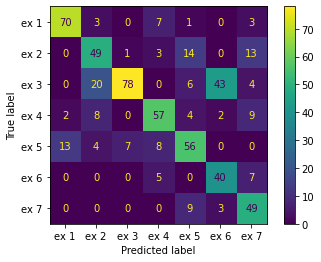

In [31]:
print('Support vector machines classification')
stats_and_cf(svm_predictions, test_set['exercise_id'].to_numpy())

Gaussian Naive Bayes classification
Classification report: 
               precision    recall  f1-score   support

        ex 1       0.88      0.76      0.82        99
        ex 2       0.30      0.50      0.37        50
        ex 3       0.73      0.72      0.72        88
        ex 4       0.50      0.82      0.62        49
        ex 5       0.82      0.50      0.62       148
        ex 6       0.80      0.83      0.81        84
        ex 7       0.80      0.85      0.82        80

    accuracy                           0.69       598
   macro avg       0.69      0.71      0.68       598
weighted avg       0.74      0.69      0.70       598

Precision score: 
 [0.88235294 0.29761905 0.73255814 0.5        0.82222222 0.79545455
 0.8       ]
Recall score: 
 [0.75757576 0.5        0.71590909 0.81632653 0.5        0.83333333
 0.85      ]
Accuracy score: 
 0.6939799331103679
F1 score: 
 0.6846699059381492


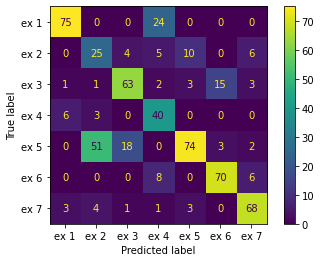

In [32]:
print("Gaussian Naive Bayes classification")
stats_and_cf(gnb_predictions, test_set['exercise_id'].to_numpy())

# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br> 
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0). 
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$. Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>
<br>
<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes in each subtasks 4.1-4.3.
    
</div>

### 4.1 Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0). Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (C parameter and RBF-kernel gamma in SVM as well as n_estimators and learning_rate in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values  𝐶=[0.1,1.0,10.0,100.0] ,  𝑔𝑎𝑚𝑚𝑎=[0.1,0.25,0.5,0.75,1.0,2.0] ,  𝑛_𝑒𝑠𝑡𝑖𝑚𝑎𝑡𝑜𝑟𝑠=[50,100,500,1000] , and  𝑙𝑒𝑎𝑟𝑛𝑖𝑛𝑔_𝑟𝑎𝑡𝑒=[0.1,0.25,0.5,0.75,1.0] . Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why?

In [33]:
# 4.1

### Your code begins here ###

feature_training_acc = [pd.DataFrame(acc_pca_set0), pd.DataFrame(acc_pca_set1), pd.DataFrame(acc_pca_set2), pd.DataFrame(train_mean_std_vector)]
feature_training_acc = pd.concat(feature_training_acc, axis=1, ignore_index=False)

feature_testing_acc = [pd.DataFrame(acc_pca_testset0), pd.DataFrame(acc_pca_testset1), pd.DataFrame(acc_pca_testset2), pd.DataFrame(test_mean_std_vector)]
feature_testing_acc = pd.concat(feature_testing_acc, axis=1, ignore_index=False)

feature_training_dc = [pd.DataFrame(dc_pca_set0), pd.DataFrame(dc_pca_set1), pd.DataFrame(dc_pca_set2),pd.DataFrame(dc_pca_set3), pd.DataFrame(dc_pca_set4) ]
feature_training_dc = pd.concat(feature_training_dc, axis=1, ignore_index=False)

feature_testing_dc = [pd.DataFrame(dc_pca_testset0), pd.DataFrame(dc_pca_testset1), pd.DataFrame(dc_pca_testset2),pd.DataFrame(dc_pca_testset3), pd.DataFrame(dc_pca_testset4) ]
feature_testing_dc = pd.concat(feature_testing_dc, axis=1, ignore_index=False)

# normalize dataset
feature_training_acc = scaler.fit_transform(feature_training_acc)
feature_testing_acc = scaler.transform(feature_testing_acc)

feature_training_dc = scaler.fit_transform(feature_training_dc)
feature_testing_dc = scaler.transform(feature_testing_dc)

### Your code ends here ###

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

C = [0.1,1.0,10.0,100.0]
gamma = [0.1,0.25,0.5,0.75,1.0,2.0]
n_estimators = [50,100,500,1000]
learning_rate = [0.1,0.25,0.5,0.75,1.0]
scaler = MinMaxScaler()

# define model parameters
svm_parameters = {'C':C, 'gamma': gamma}
adaBoost_parameters = {'learning_rate': learning_rate,'n_estimators':n_estimators }

# models
svm_model = svm.SVC(kernel='rbf')
ada_model = AdaBoostClassifier(random_state=0)

svm_clf = GridSearchCV(svm_model, svm_parameters, cv=10)
adaBoost = GridSearchCV(ada_model, adaBoost_parameters, cv=10)

In [35]:
# best hyperparams for acc data - SVM
svm_clf.fit(feature_training_acc, train_set['exercise_id'])
svm_best_params_acc = svm_clf.best_params_
print('Best hyperparameters for SVM training acc data : ',svm_best_params_acc)

Best hyperparameters for SVM training acc data :  {'C': 10.0, 'gamma': 2.0}


In [36]:
# best hyperparams for dc data - SVM

svm_clf.fit(feature_training_dc, train_set['exercise_id'])
svm_best_params_dc = svm_clf.best_params_
print('Best hyperparameters for SVM training dc data: ',svm_best_params_dc)

Best hyperparameters for SVM training dc data:  {'C': 10.0, 'gamma': 2.0}


In [37]:
# adabost - acc
adaBoost.fit(feature_training_acc, train_set['exercise_id'])
ada_best_params_acc = adaBoost.best_params_
print('Best hyperparameters for AdaBoost training acc :', ada_best_params_acc)

Best hyperparameters for AdaBoost training acc : {'learning_rate': 0.25, 'n_estimators': 500}


In [38]:
# adabost - dc
adaBoost.fit(feature_training_dc, train_set['exercise_id'])
ada_best_params_dc = adaBoost.best_params_
print('Best hyperparameters for AdaBoost training acc :', ada_best_params_dc)

Best hyperparameters for AdaBoost training acc : {'learning_rate': 0.75, 'n_estimators': 1000}


### 4.2 Predict probabilistic outputs of each trained classifier for both modalities using the test set.


In [39]:
# 4.2

### Your code begins here ###



# Training SVM with best hyper paremeters
svm_best_acc = svm.SVC(kernel='rbf', C=svm_best_params_acc['C'], gamma=svm_best_params_acc['gamma'], probability=True)
svm_best_acc.fit(feature_training_acc, train_set['exercise_id'])

svm_best_dc = svm.SVC(kernel='rbf', C=svm_best_params_dc['C'], gamma=svm_best_params_dc['gamma'], probability=True)
svm_best_dc.fit(feature_training_dc, train_set['exercise_id'])

svm_pred_acc = svm_best_acc.predict(feature_testing_acc)
svm_probability_acc = svm_best_acc.predict_proba(feature_testing_acc)
print('The predicted probabilities for acc data using SVM are')
print(svm_probability_acc)

svm_pred_dc = svm_best_dc.predict(feature_testing_dc)
svm_probability_dc = svm_best_dc.predict_proba(feature_testing_dc)
print('The predicted probabilities for dc data using SVM are')
print(svm_probability_dc)

The predicted probabilities for acc data using SVM are
[[9.66704899e-01 3.88613118e-03 3.96634779e-03 ... 2.64479744e-03
  2.02548722e-03 3.46038001e-03]
 [9.92843658e-01 4.54369905e-04 2.21087959e-03 ... 5.61724538e-04
  9.03175797e-04 6.00776345e-04]
 [9.93574705e-01 4.11470960e-04 1.09600775e-03 ... 1.86897196e-03
  5.44628829e-04 5.44243887e-04]
 ...
 [3.31804331e-02 1.44240526e-01 4.48795582e-02 ... 1.02266247e-01
  4.17037986e-02 1.69082935e-01]
 [7.94217714e-04 9.85193958e-04 1.09055122e-03 ... 3.87176386e-03
  1.19170192e-03 2.68639976e-03]
 [1.78881937e-02 8.92408473e-02 3.09369617e-02 ... 1.82006415e-01
  1.78729896e-02 1.62842070e-01]]
The predicted probabilities for dc data using SVM are
[[0.78335631 0.04951655 0.05047958 ... 0.00539708 0.01127391 0.01741664]
 [0.80697319 0.00594619 0.00556719 ... 0.00267407 0.00413011 0.00415337]
 [0.93231601 0.00418812 0.00931734 ... 0.00320708 0.00743291 0.00352862]
 ...
 [0.16987333 0.02882091 0.02606465 ... 0.02798135 0.04411914 0.6879

In [40]:
# Train adaboost with best hyperparams
adaBoost_best_acc = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_acc['learning_rate'], n_estimators=ada_best_params_acc['n_estimators'] )
adaBoost_best_acc.fit(feature_training_acc, train_set['exercise_id'])

adaBoost_best_dc = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_dc['learning_rate'], n_estimators=ada_best_params_dc['n_estimators'] )
adaBoost_best_dc.fit(feature_training_dc, train_set['exercise_id'])


adaBoost_pred_acc = adaBoost_best_acc.predict(feature_testing_acc)
adaBoost_probability_acc = adaBoost_best_acc.predict_proba(feature_testing_acc)
print('The predicted probabilities for dc data using AdaBoost are')
print(adaBoost_probability_acc)

adaBoost_pred_dc = adaBoost_best_dc.predict(feature_testing_dc)
adaBoost_probability_dc = adaBoost_best_dc.predict_proba(feature_testing_dc)
print('The predicted probabilities for dc data using AdaBoost are')
print(adaBoost_probability_dc)

### Your code ends here ###


The predicted probabilities for dc data using AdaBoost are
[[0.25797174 0.14284486 0.10937945 ... 0.17587997 0.0067571  0.13436963]
 [0.27867282 0.17812339 0.10196364 ... 0.12632002 0.01034559 0.11482169]
 [0.19937698 0.15688337 0.14145618 ... 0.12993127 0.00777621 0.16370125]
 ...
 [0.13914251 0.15875633 0.16209553 ... 0.22713151 0.01253735 0.16140405]
 [0.15965604 0.16314307 0.08979551 ... 0.19061975 0.00347822 0.15785836]
 [0.15308144 0.15286193 0.15371663 ... 0.22583413 0.01019322 0.161185  ]]
The predicted probabilities for dc data using AdaBoost are
[[0.14139192 0.13214008 0.17262622 ... 0.0415984  0.16033402 0.16256358]
 [0.22965821 0.08884359 0.15329971 ... 0.03759298 0.12855123 0.18207131]
 [0.19494558 0.10483197 0.14852644 ... 0.03259552 0.17762958 0.15212627]
 ...
 [0.06905277 0.14044958 0.16244558 ... 0.08410993 0.26808827 0.20732135]
 [0.0420203  0.14151796 0.17756431 ... 0.11098993 0.26034073 0.19528496]
 [0.16803854 0.05643949 0.16943658 ... 0.08623774 0.18692502 0.24875

### 4.3 Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e.,  𝑆𝑉𝑀𝑎𝑐𝑐+𝑆𝑉𝑀𝑑𝑒𝑝𝑡ℎ ,  𝐴𝑑𝑎𝐵𝑜𝑜𝑠𝑡𝑎𝑐𝑐+𝐴𝑑𝑎𝐵𝑜𝑜𝑠𝑡𝑑𝑒𝑝𝑡ℎ ,  𝑆𝑉𝑀𝑎𝑐𝑐+𝐴𝑑𝑎𝐵𝑜𝑜𝑠𝑡𝑑𝑒𝑝𝑡ℎ ,  𝐴𝑑𝑎𝐵𝑜𝑜𝑠𝑡𝑎𝑐𝑐+𝑆𝑉𝑀𝑑𝑒𝑝𝑡ℎ )

Confusion matrix: 

SVM_acc F1:  0.4867143392881697
SVM acc CM
SVM_dc F1:  0.7794110538200647
SVM dc 
ADA_acc F1:  0.4294032644299608
AdaBoost acc
ADA_dc F1:  0.4212076170270173
AdaBoost dc


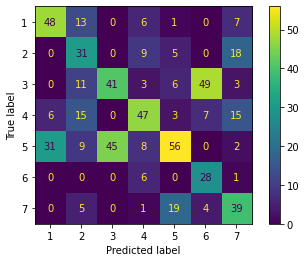

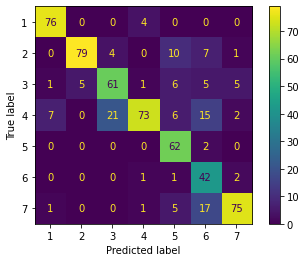

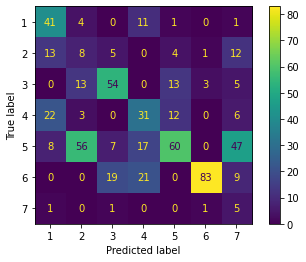

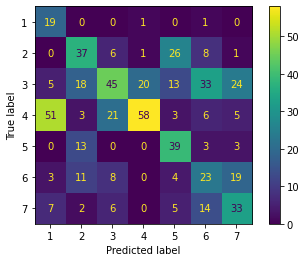

In [56]:
# 4.3

### Your code begins here ###

#confusion matrix and F1 score of individual classifiers
class_names = ['1','2','3','4','5','6', '7']

print("Confusion matrix: \n")

def confusion_mat_individual(classifier, name):
    print(name)
    cm = metrics.confusion_matrix(classifier, test_set['exercise_id'])
    metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
    
    
print('SVM_acc F1: ', metrics.f1_score(svm_pred_acc, test_set['exercise_id'], average='macro'))
confusion_mat_individual(svm_pred_acc, 'SVM acc CM')


print('SVM_dc F1: ', metrics.f1_score(svm_pred_dc,test_set['exercise_id'], average='macro'))
confusion_mat_individual(svm_pred_dc, 'SVM dc ')


print('ADA_acc F1: ', metrics.f1_score(adaBoost_pred_acc, test_set['exercise_id'], average='macro'))
confusion_mat_individual(adaBoost_pred_acc, 'AdaBoost acc')


print('ADA_dc F1: ', metrics.f1_score(adaBoost_pred_dc, test_set['exercise_id'], average='macro'))
confusion_mat_individual(adaBoost_pred_dc, 'AdaBoost dc')


# classifier combinations
svm_acc_svm_dc = np.array((svm_probability_acc, svm_probability_dc))
ada_acc_ada_dc = np.array((adaBoost_probability_acc, adaBoost_probability_dc))
svm_acc_ada_dc = np.array((svm_probability_acc, adaBoost_probability_dc))
ada_acc_svm_dc = np.array((adaBoost_probability_acc, svm_probability_dc))



### Your code ends here ###

In [57]:
label = np.array([1,2,3,4,5,6,7])

# method to caclulate F1 score and confusion matrix of each combination operations
def get_f1_score(data, operator):
    if(operator == 'max'):
        acc = metrics.f1_score(label[np.argmax(np.max(data,axis=0),axis=1)],test_set['exercise_id'], average='macro')
        cm = metrics.confusion_matrix(test_set['exercise_id'],label[np.argmax(np.max(data,axis=0),axis=1)])
        metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
        print('Max: ', acc)
        return acc
    elif(operator == 'min'):
        acc = metrics.f1_score(label[np.argmax(np.min(data,axis=0),axis=1)],test_set['exercise_id'], average='macro')
        cm = metrics.confusion_matrix(test_set['exercise_id'],label[np.argmax(np.min(data,axis=0),axis=1)])
        metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
        print('Min: ', acc)
        return acc
    elif(operator == 'prod'):
        acc = metrics.f1_score(label[np.argmax(np.prod(data,axis=0),axis=1)],test_set['exercise_id'], average='macro')
        cm = metrics.confusion_matrix(test_set['exercise_id'],label[np.argmax(np.prod(data,axis=0),axis=1)])
        metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
        print('Prod: ', acc)
        return acc
    else:
        acc = metrics.f1_score(label[np.argmax(np.sum(data,axis=0),axis=1)],test_set['exercise_id'], average='macro')
        cm = metrics.confusion_matrix(test_set['exercise_id'],label[np.argmax(np.sum(data,axis=0),axis=1)])
        metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
        print('Sum: ', acc)
        return acc
    


SVM_acc and SVM_dc F1 scores
Max:  0.7748971360243704
Min:  0.7895352309432945
Prod:  0.83767259339941
Sum:  0.8006789239198021


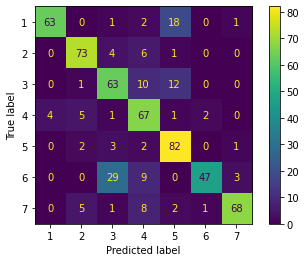

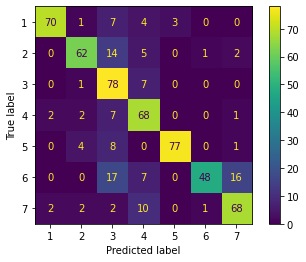

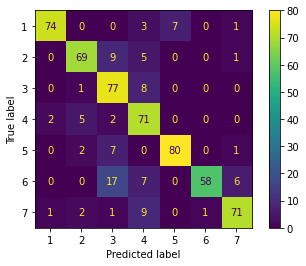

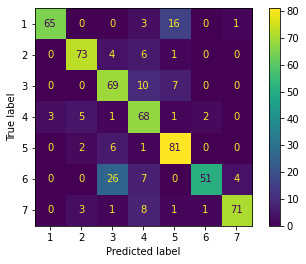

In [58]:

print("SVM_acc and SVM_dc F1 scores")

operators = ['max', 'min', 'prod', 'sum']

for i, val in enumerate(operators):
    get_f1_score(svm_acc_svm_dc, val)


AdaBoost acc and AdaBoost dc F1 scores
Max:  0.41673659644045496
Min:  0.4468549275301056
Prod:  0.5222608144663178
Sum:  0.5166381094444076


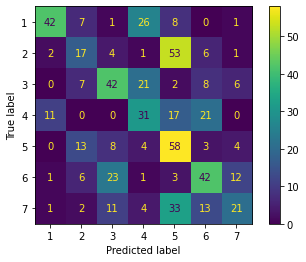

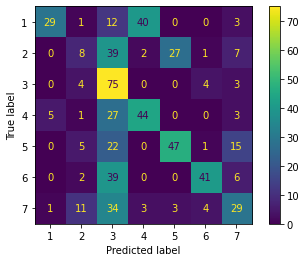

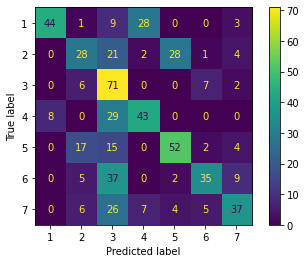

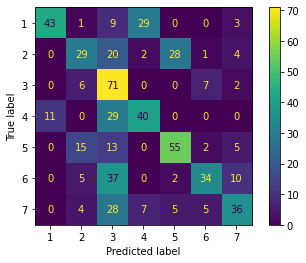

In [59]:

print("AdaBoost acc and AdaBoost dc F1 scores")

for i, val in enumerate(operators):
    get_f1_score(ada_acc_ada_dc, val)
    

SVM acc and AdaBoost dc F1 scores
Max:  0.5065434008548825
Min:  0.5811691631042599
Prod:  0.5754739255500236
Sum:  0.5289773887083483


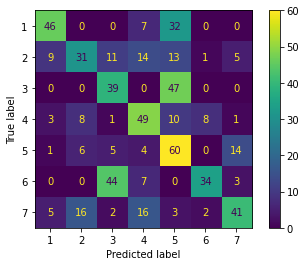

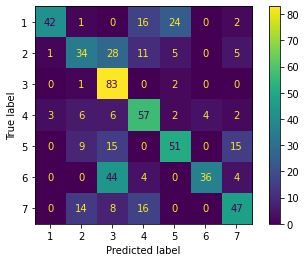

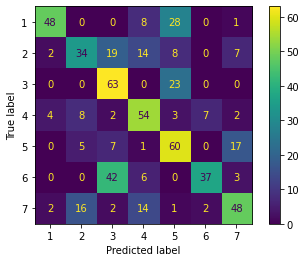

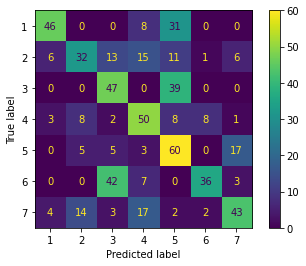

In [60]:
print("SVM acc and AdaBoost dc F1 scores")

for i, val in enumerate(operators):
    get_f1_score(svm_acc_ada_dc, val)


AdaBoost acc and SVM dc F1 scores
Max:  0.7863744484116523
Min:  0.8182609463936087
Prod:  0.8110495603833151
Sum:  0.8026833639609545


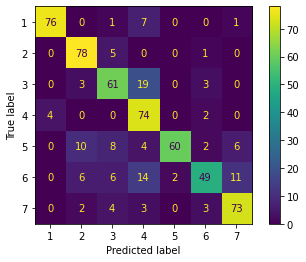

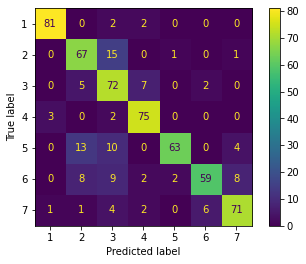

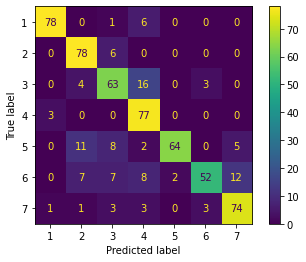

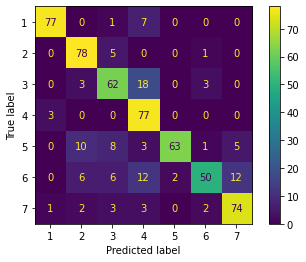

In [61]:
print("AdaBoost acc and SVM dc F1 scores")

for i, val in enumerate(operators):
    get_f1_score(ada_acc_svm_dc, val)
    

# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br> 
<br> 
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br> 
<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [51]:
# 5.1

### Your code begins here ###

### Your code ends here ###

In [52]:
# 5.2

### Your code begins here ###

### Your code ends here ###